In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
df = pandas.read_csv("data.csv")

In [2]:
#initializing the decision tree values

d = {'Depression': 0, 'Normal': 1, 'treating': 2}

df["Type"] = df["Type"].map(d)

########################################################

d = {'Y': 1, 'N': 0}

df["Change"] = df["Change"].map(d)
df["Skip"] = df["Skip"].map(d)
df["Overtime"] = df["Overtime"].map(d)
df["Submit"] = df["Submit"].map(d)

########################################################

d = {'Relate': 1, 'Not Relate': 0}
df["Lable"] = df["Lable"].map(d)


In [3]:
features = ["Type", "Score" , "Change", "Skip", "Overtime", "Submit", "Worry", "Sad", "Happy", "No Emotion"]

x = df[features]
y = df["Lable"]

In [4]:
data_test = df.copy()

In [5]:
# Finding the best random state from 1 to 100 and test size from 0.10 to 0.90
test_size = []
random_state = []
accuracy = []
for i in range(1, 100):
    for j in range(10, 90):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=j/100, random_state=i)
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        test_size.append(j/100)
        random_state.append(i)
        accuracy.append(accuracy_score(y_test, y_pred))

# Finding the best random state and test size
max_accuracy = max(accuracy)
index = accuracy.index(max_accuracy)
best_random_state = random_state[index]
best_test_size = test_size[index]

print("Best Random State: ", best_random_state)
print("Best Test Size: ", best_test_size)
print("Accuracy: ", max_accuracy)

Best Random State:  4
Best Test Size:  0.12
Accuracy:  1.0


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



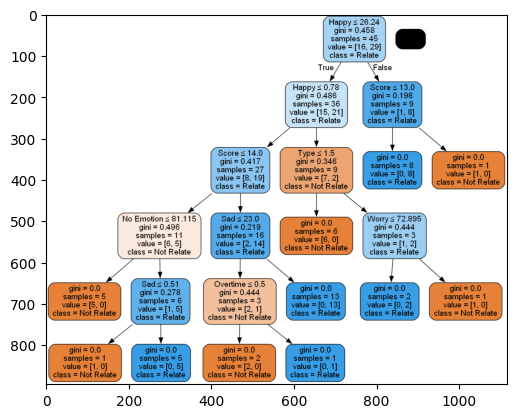

In [6]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=best_test_size, random_state=best_random_state)

# Training the model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predicting the values
y_pred = clf.predict(X_test)

# Calculating the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculating the classification report
print(classification_report(y_test, y_pred))

# Plotting the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=[
                                "Not Relate", "Relate"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
img = pltimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()

# Predicting the values for the whole data
y_pred = clf.predict(x)

# Adding the predicted values to the data
data_test["Predicted"] = y_pred

# Saving the data to a csv file
data_test.to_csv("data_test.csv", index=False)

# Saving the decision tree to a png file
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=[
                                "Not Relate", "Relate"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# Saving the decision tree to a pdf file
graph.write_pdf("tree.pdf")

# Saving the decision tree to a dot file
tree.export_graphviz(clf, out_file='tree.dot', feature_names=features, class_names=[
                     "Not Relate", "Relate"], filled=True, rounded=True, special_characters=True)


In [7]:
print("Best Random State: ", best_random_state)
print("Best Test Size: ", best_test_size)

Best Random State:  4
Best Test Size:  0.12


In [8]:
# Export DecisionTreeClassifier model to a pickle file
import pickle
pickle.dump(clf, open("model.pkl", "wb"))

# Load DecisionTreeClassifier model from a pickle file
clf = pickle.load(open("model.pkl", "rb"))